In [1]:
import pandas as pd

## Bussines Understanding

Permasalahan dalam ekonomi adalah tidak jauh dari `Inflasi, Deflasi dan Resesi` dimana dari beberapa sumber yang telah kami pelajari bisa di simpulkan adalah kejadian naik turunnya keadaan ekonomi

Pada kasus kali ini, data yang di berikan oleh kementrian keuangan pada acara Finance and Healt Hackathon adalah data terkait keuangan perbankan dan kegiatan operasional kesehatan untuk dianalisa agar bisa menyelesaikan masalah yang ada di negara kita yaitu Indonesia Tercinta

Dari beberapa dataset yang disediakan, tim kami memilih data keuangan dan perbankan yaitu Data [Distribusi dan LPS](https://drive.google.com/drive/folders/1Tadl9BQJ62R89bbD69Zchf-iziDgbxH3) yang disediakan oleh kementrian keuangan.

In [2]:
df_dist = pd.read_excel('bank/data/Dataset LPS - Data Distribusi Simpanan.xlsx', sheet_name='Distribusi Simpanan Bank Umum')
df_lps = pd.read_excel('bank/data/Dataset LPS - Data Distribusi Simpanan.xlsx', sheet_name='LPS Rate')

In [3]:
df_dist.head()

,years,month,Tiering Nominal,Jenis Usaha,Jenis Simpanan,Pemilik Simpanan,KBMI,Currency,Nominal,Rekening
0,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Dari Bank Lain,NaN,IDR,0.0,0.0
1,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Dari Bank Lain,NaN,USD,0.0,0.0
2,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Dari Bank Lain,KBMI 1,IDR,0.0,0.0
3,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Dari Bank Lain,KBMI 1,USD,0.0,0.0
4,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Dari Bank Lain,KBMI 2,IDR,0.0,0.0


In [4]:
df_lps.head()

,id,start_period,end_period,suku_bunga_bpr,suku_bunga_bankumum_rupiah,suku_bunga_bankumum_valas,end_period2
0,1,2005-09-15,2006-01-14,15.5,10.5,4.25,2005-10-15
1,2,2005-10-15,2006-01-14,16.5,11.5,4.25,2005-11-15
2,3,2005-11-15,2006-01-14,18.0,13.0,4.25,2005-12-15
3,4,2005-12-15,2006-01-14,18.0,13.0,4.25,2006-01-15
4,5,2006-01-15,2006-05-14,18.0,13.0,4.25,2006-02-15


In [5]:
# Info dasar Data Distribusi simpanan
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83030 entries, 0 to 83029
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   years             83030 non-null  int64  
 1   month             83030 non-null  int64  
 2   Tiering Nominal   83030 non-null  object 
 3   Jenis Usaha       83030 non-null  object 
 4   Jenis Simpanan    83030 non-null  object 
 5   Pemilik Simpanan  83030 non-null  object 
 6   KBMI              82470 non-null  object 
 7   Currency          83030 non-null  object 
 8   Nominal           83030 non-null  float64
 9   Rekening          83030 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 6.3+ MB


In [6]:
df_lps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          138 non-null    int64  
 1   start_period                138 non-null    object 
 2   end_period                  138 non-null    object 
 3   suku_bunga_bpr              138 non-null    float64
 4   suku_bunga_bankumum_rupiah  138 non-null    float64
 5   suku_bunga_bankumum_valas   138 non-null    float64
 6   end_period2                 138 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 7.7+ KB


In [7]:
df_dist.isna().sum()

years                 0
month                 0
Tiering Nominal       0
Jenis Usaha           0
Jenis Simpanan        0
Pemilik Simpanan      0
KBMI                560
Currency              0
Nominal               0
Rekening              0
dtype: int64

In [8]:
print(f'Macam karakter kolom bulan: {df_dist.month.unique()}')

Macam karakter kolom bulan: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [9]:
df_dist.years.unique()

array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

Data Distribusi simpanan merupakan data panel dimana intervalnya adalah dari 2017-2022

## Data Preparation

In [10]:
df_lps.dtypes

id                              int64
start_period                   object
end_period                     object
suku_bunga_bpr                float64
suku_bunga_bankumum_rupiah    float64
suku_bunga_bankumum_valas     float64
end_period2                    object
dtype: object

In [11]:
df_lps.end_period

0      2006-01-14
1      2006-01-14
2      2006-01-14
3      2006-01-14
4      2006-05-14
          ...    
133    2021-05-28
134    2021-09-29
135    2022-01-28
136    2022-05-27
137    2022-09-30
Name: end_period, Length: 138, dtype: object

### Data Cleansing

In [12]:
df_dist.isna().sum()

years                 0
month                 0
Tiering Nominal       0
Jenis Usaha           0
Jenis Simpanan        0
Pemilik Simpanan      0
KBMI                560
Currency              0
Nominal               0
Rekening              0
dtype: int64

Dari beberapa kolom yang tersedia diantara 2 Heet data tersebut, kami memiliki sebuah hypotesis yaitu tentang inflasi dan deflasi dimana kita akan menggunakan `Kurs Jual` sebagai variabel terkait (Y) karena jika kolom-kolom yang tersedia bisa mempengaruhi nilai jual kurs.

Kurs Jual = Rupiah => Dolar

Data kurs tersebut kami peroleh dari [Bank Indonesia](https://www.bi.go.id/id/statistik/ekonomi-keuangan/seki/Default.aspx)

In [13]:
df_kurs = pd.read_excel('bank/data/Kurs Transaksi USD.xlsx')
df_kurs

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Kurs Transaksi USD,Kurs Transaksi USD,Kurs Transaksi USD,Kurs Transaksi USD,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal
4,1,1,15032.79,14883.21,7/29/2022 12:00:00 AM
...,...,...,...,...,...
1350,1347,1,13396,13262,2/6/2017 12:00:00 AM
1351,1348,1,13429,13295,2/3/2017 12:00:00 AM
1352,1349,1,13441,13307,2/2/2017 12:00:00 AM
1353,1350,1,13416,13282,2/1/2017 12:00:00 AM


In [14]:
df_kurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1353 non-null   object
 1   Unnamed: 1  1353 non-null   object
 2   Unnamed: 2  1353 non-null   object
 3   Unnamed: 3  1353 non-null   object
 4   Unnamed: 4  1352 non-null   object
dtypes: object(5)
memory usage: 53.1+ KB


In [15]:
df_kurs.dropna(inplace=True)

In [16]:
df_kurs = df_kurs.reset_index(drop=False)

In [17]:
df_kurs.head()

,index,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,3,NO,Nilai,Kurs Jual,Kurs Beli,Tanggal
1,4,1,1,15032.79,14883.21,7/29/2022 12:00:00 AM
2,5,2,1,15095.1,14944.9,7/28/2022 12:00:00 AM
3,6,3,1,15058.92,14909.08,7/27/2022 12:00:00 AM
4,7,4,1,15066.96,14917.04,7/26/2022 12:00:00 AM


In [18]:
list_drop = ['index', 'Unnamed: 0', 'Unnamed: 1', 'Unnamed: 3']

df_kurs.drop(list_drop, axis=1, inplace=True)

In [19]:
df_kurs.drop(0, inplace=True)
df_kurs = df_kurs.reset_index(drop=True)

In [20]:
kurs = df_kurs.rename(columns={'Unnamed: 2': 'Kurs', 'Unnamed: 4':'Tanggal'})

In [21]:
kurs

,Kurs,Tanggal
0,15032.79,7/29/2022 12:00:00 AM
1,15095.1,7/28/2022 12:00:00 AM
2,15058.92,7/27/2022 12:00:00 AM
3,15066.96,7/26/2022 12:00:00 AM
4,15099.12,7/25/2022 12:00:00 AM
...,...,...
1346,13396,2/6/2017 12:00:00 AM
1347,13429,2/3/2017 12:00:00 AM
1348,13441,2/2/2017 12:00:00 AM
1349,13416,2/1/2017 12:00:00 AM


In [22]:
kurs.Tanggal = pd.to_datetime(kurs.Tanggal, infer_datetime_format=True)

In [23]:
kurs.dtypes

Kurs               object
Tanggal    datetime64[ns]
dtype: object

In [24]:
kurs['Tahun'] = pd.DatetimeIndex(kurs['Tanggal']).year
kurs.head()

,Kurs,Tanggal,Tahun
0,15032.79,2022-07-29,2022
1,15095.1,2022-07-28,2022
2,15058.92,2022-07-27,2022
3,15066.96,2022-07-26,2022
4,15099.12,2022-07-25,2022


In [25]:
#kurs.to_excel('kurs_data.xlsx')

### Update Data dengan Spreadsheet

[Klik](https://docs.google.com/spreadsheets/d/1pq9PNb45CvAU-jpcdlYzcT5IUaWymGdJ/edit?usp=sharing&ouid=111724846718157151554&rtpof=true&sd=true) untuk melihatnya

In [26]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('bank/data/Dataset LPS - Data Distribusi Simpanan_update.xlsx', sheet_name='Distribusi Simpanan Bank Umum')
df.head()

,years,month,Tiering Nominal,Jenis Usaha,Jenis Simpanan,Pemilik Simpanan,KBMI,Currency,Nominal,Rekening,suku_bunga_bpr,sukbung_bankumum,sukbung_bankumum_valas,kurs
0,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Dari Bank Lain,NaN,IDR,0,0,8.666667,6.166667,0.75,13453.466063
1,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Dari Bank Lain,NaN,USD,0,0,8.666667,6.166667,0.75,13453.466063
2,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Dari Bank Lain,KBMI 1,IDR,0,0,8.666667,6.166667,0.75,13453.466063
3,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Dari Bank Lain,KBMI 1,USD,0,0,8.666667,6.166667,0.75,13453.466063
4,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Dari Bank Lain,KBMI 2,IDR,0,0,8.666667,6.166667,0.75,13453.466063


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83030 entries, 0 to 83029
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   years                   83030 non-null  int64  
 1   month                   83030 non-null  int64  
 2   Tiering Nominal         83030 non-null  object 
 3   Jenis Usaha             83030 non-null  object 
 4   Jenis Simpanan          83030 non-null  object 
 5   Pemilik Simpanan        83030 non-null  object 
 6   KBMI                    82470 non-null  object 
 7   Currency                83030 non-null  object 
 8   Nominal                 83030 non-null  int64  
 9   Rekening                83030 non-null  int64  
 10  suku_bunga_bpr          83030 non-null  float64
 11  sukbung_bankumum        83030 non-null  float64
 12  sukbung_bankumum_valas  83030 non-null  float64
 13  kurs                    83030 non-null  float64
dtypes: float64(4), int64(4), object(6)
mem

Pada Analisis dengan Spread Sheet kami membuat 4 kolom baru yaitu:
1. `suku_bunga_bpr`: Adalah rata-rata suku bunga BPR pertahun
2. `sukbung_bankumum`: Adalah rata-rata suku bunga dari bang umum pertahun
3. `sukbung_bankumum_valas`: Adalah rata-rata suku bunga bank umum luar negeri
4. `Kurs`: Adalah rata-rata nilai kurs jual dari rupiah ke dolar pertahun

In [28]:
num_cols = df.select_dtypes('number').columns
object_cols = df.select_dtypes('object').columns
print(num_cols)
print(object_cols)

Index(['years', 'month', 'Nominal', 'Rekening', 'suku_bunga_bpr',
       'sukbung_bankumum', 'sukbung_bankumum_valas', 'kurs'],
      dtype='object')
Index(['Tiering Nominal', 'Jenis Usaha', 'Jenis Simpanan', 'Pemilik Simpanan',
       'KBMI', 'Currency'],
      dtype='object')


In [29]:
df.isna().sum()

years                       0
month                       0
Tiering Nominal             0
Jenis Usaha                 0
Jenis Simpanan              0
Pemilik Simpanan            0
KBMI                      560
Currency                    0
Nominal                     0
Rekening                    0
suku_bunga_bpr              0
sukbung_bankumum            0
sukbung_bankumum_valas      0
kurs                        0
dtype: int64

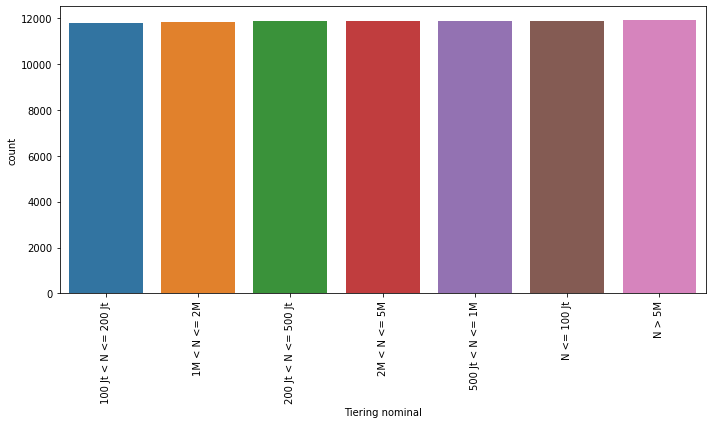

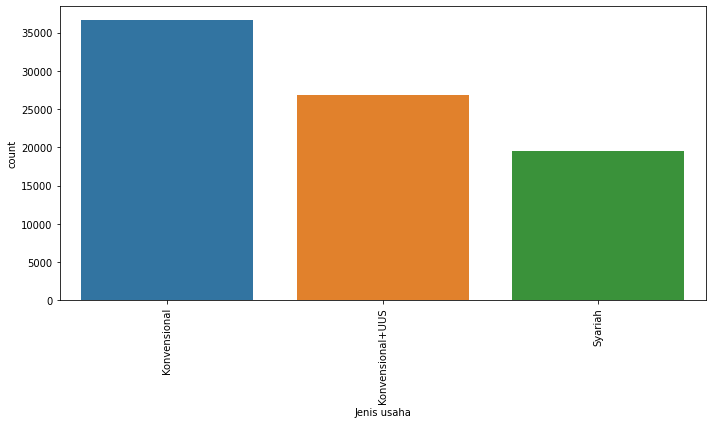

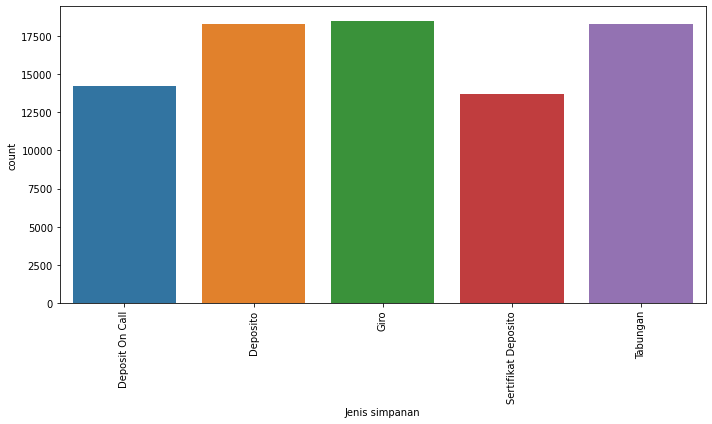

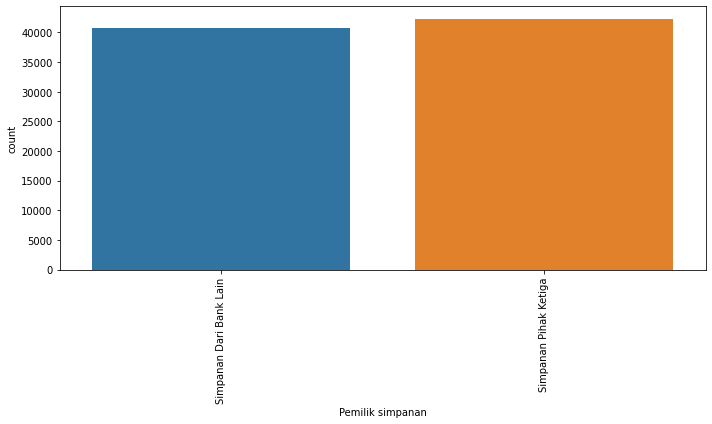

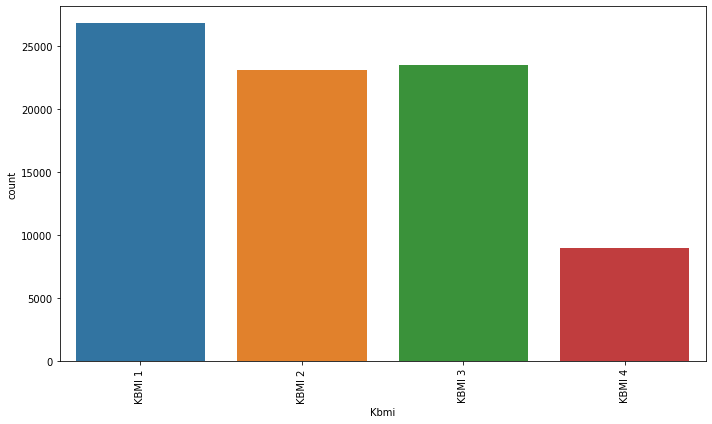

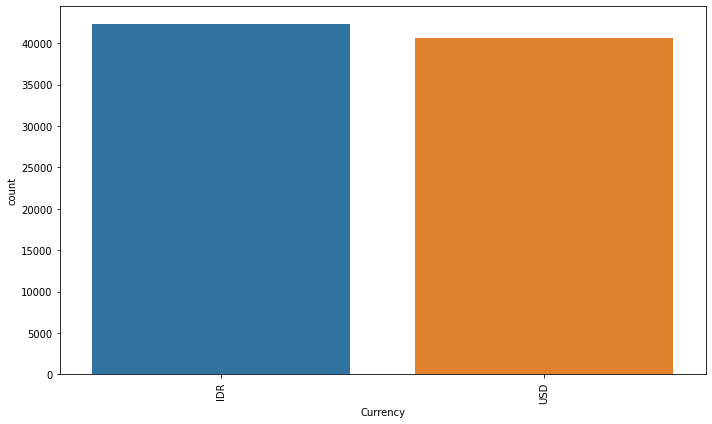

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_hist(df, columns):
    for col in columns:
        plt.figure(figsize=(10,6))
        sns.countplot(x=col, data=df)
        plt.xlabel(col.capitalize())
        plt.xticks(rotation='90')
        plt.tight_layout()
        plt.show()

plot_all_hist(df, object_cols)

Hanya terdapat 1 kolom yang memiliki banyak nilai missing yaitu `KBMI`. Namun kami tidak akan membuang kolom tersebut, barang kali kolom tersebut bisa bermanfaat pada analisis.

In [31]:
df['KBMI'] = df['KBMI'].fillna('KBMI 1')

In [32]:
df.describe()

,years,month,Nominal,Rekening,suku_bunga_bpr,sukbung_bankumum,sukbung_bankumum_valas,kurs
count,83030.000000,83030.000000,8.303000e+04,8.303000e+04,83030.000000,83030.000000,83030.000000,83030.000000
mean,2019.174033,6.314332,4.967187e+12,2.504702e+05,8.140882,5.640866,1.223682,14222.021104
std,1.555887,3.439288,2.715643e+13,5.986788e+06,0.970797,0.970808,0.564293,402.418873
min,2017.000000,1.000000,0.000000e+00,0.000000e+00,6.000000,3.500000,0.250000,13453.466063
25%,2018.000000,3.000000,0.000000e+00,0.000000e+00,8.125000,5.625000,0.750000,14217.060488
50%,2019.000000,6.000000,4.955730e+09,7.000000e+00,8.500000,6.000000,1.166667,14317.694215
75%,2020.000000,9.000000,6.383151e+11,4.680000e+02,8.666667,6.166667,1.583333,14383.519141
max,2022.000000,12.000000,6.330678e+14,3.142126e+08,9.300000,6.800000,2.150000,14645.120602


Tapi terlihat disini bahwa kolom nominal memiliki nilai yang tidak wajar yaitu `**0**`, sebenarnya ini adalah missing value seperti yang telah kami anaisis pada Spread Sheet sebelumnya, namun karena ada sebuah karakter jadi pandas membacanya menjadi 0

Jadi, kami akan menghapus baris yang memiliki nominal 0

In [33]:
df_clean = df.loc[df['Nominal']>0]
df_clean = df_clean.reset_index()

In [34]:
df_clean.describe()

,index,years,month,Nominal,Rekening,suku_bunga_bpr,sukbung_bankumum,sukbung_bankumum_valas,kurs
count,49364.000000,49364.000000,49364.000000,4.936400e+04,4.936400e+04,49364.000000,49364.000000,49364.000000,49364.000000
mean,43209.399117,2019.295843,6.222348,8.354784e+12,4.212896e+05,8.051145,5.551145,1.183650,14238.625004
std,24694.936594,1.625987,3.422458,3.481567e+13,7.759766e+06,1.047161,1.047161,0.588646,399.290985
min,12.000000,2017.000000,1.000000,1.500000e+01,1.000000e+00,6.000000,3.500000,0.250000,13453.466063
25%,21792.750000,2018.000000,3.000000,1.703250e+10,2.300000e+01,6.812500,4.312500,0.750000,14217.060488
50%,43245.000000,2019.000000,6.000000,2.119080e+11,1.790000e+02,8.500000,6.000000,1.166667,14317.694215
75%,65002.250000,2021.000000,9.000000,2.882068e+12,2.631000e+03,8.666667,6.166667,1.583333,14582.468409
max,83029.000000,2022.000000,12.000000,6.330678e+14,3.142126e+08,9.300000,6.800000,2.150000,14645.120602


In [35]:
df_clean.duplicated().sum()

0

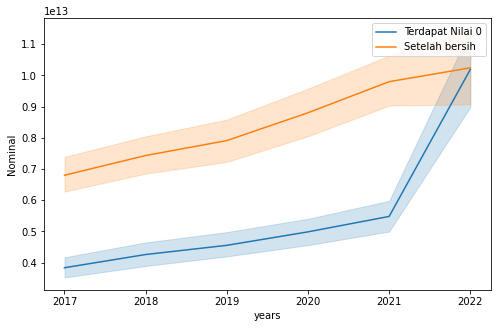

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='years', y='Nominal', label='Terdapat Nilai 0')
sns.lineplot(data=df_clean, x='years', y='Nominal', label='Setelah bersih')
plt.legend()
plt.show()

Bisa dilihat perbedaannya bahwa data 0 tersebut sangatlah mempengaruhi distribusi dari nominal

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49364 entries, 0 to 49363
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   49364 non-null  int64  
 1   years                   49364 non-null  int64  
 2   month                   49364 non-null  int64  
 3   Tiering Nominal         49364 non-null  object 
 4   Jenis Usaha             49364 non-null  object 
 5   Jenis Simpanan          49364 non-null  object 
 6   Pemilik Simpanan        49364 non-null  object 
 7   KBMI                    49364 non-null  object 
 8   Currency                49364 non-null  object 
 9   Nominal                 49364 non-null  int64  
 10  Rekening                49364 non-null  int64  
 11  suku_bunga_bpr          49364 non-null  float64
 12  sukbung_bankumum        49364 non-null  float64
 13  sukbung_bankumum_valas  49364 non-null  float64
 14  kurs                    49364 non-null

In [38]:
# df_clean.to_csv('data_bersih_simpanan.csv', index=False)

## Exploratory Data Analysist

Untuk menganalisa data lebih lanjut, kami menggunakan tablue untuk melakukan visualisasi dan mencari insign apa yang bisa kami ambil pada [visualisasi tablue](https://public.tableau.com/views/SimpanandanLPS/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)

#### Dashboard Bank Umum
1. `Suku bunga Bank Umum berdasarkan Jenis Simpanan dan Currency`: Terlihat bahwa memang nasabah yang menyimpan dana dengan Sertifikat Deposito selalu sedikit baik dari mata uang rupiah (IDR) atau mata uang (USD), sedangkan Deposito, Giro dan Tabungan selalu memiliki jumlah banyak nasabah yang tinggi baik dari IDR atau USD.
2. `Tiering dan KBMI berdasarkan suku bunga bank umum`: Dari ke 4 kode KBMI distribusi dari Tiering Simpanan tidak terlihat adanya perbedaan signifikan namun pada KBMI 4 masih jumlahnya lebih sedikit meskipun memiliki distribusi yang sama dengan KBMI yang lainnya
3. `Sebaran Kurs dan Suku Bunga Bank Umum`: Pada scatter plot tersebut terlihat antara suku bunga dengan kurs memiliki hubungan yang linear dimana persebarannya terlihat dekat. Ini menandakan kedua variabel tersebut saling berhubungan.

#### Dashboard BPR
1. `Jenis Simpanan dan Currency berdasarkan Suku Bunga BPR`: Pada grafik ini memiliki kesamaan dengan `Tiering dan KBMI berdasarkan suku bunga bank umum` dimana nasabah yang menyimpan dana dengan Sertifikat Deposito selalu sedikit baik dari mata uang rupiah (IDR) atau mata uang (USD), sedangkan Deposito, Giro dan Tabungan selalu memiliki jumlah banyak nasabah yang tinggi baik dari IDR atau USD.
2. `KBMI dan Pemilik Simpanan berdasarkan suku bunga BPR`: Dari perbandingan sukun bunga BPR antara pemilik simpanadan dan KBMI terlihat simpanan pihak ketiga selalu lebih unggul dari ke 4 KBMI tersebut dibandingkan Simpanan Dari Bank Lain.
3. `Currency dan Tearing Nominal`: Antara Tiering dan Currency terlihat memiliki distribusi yang sama dengan seperti Suku Bunga Bank umum dimana antara IDR dan USD jauh lebih dominan pada mata uang rupiah(IDR).
4. `Sebaran Suku bunga BPR dan Kurs`: Dari scatter plot ternyata suku bunga dari BPR juga memiliki hubungan linear dengan kurs, bahkan kedekatan data melebihi kedekatan antara `Suku Bunga Bank Umum dan Kurs`.

#### Dashboard Nominal
1. `Nominal Jenis Simpanan dan Currency`: Seperti yang sebelumnya memang dari data ini jumlah Tabungan, Giro dan Deposito memang selalu lebih tinggi, bahkan dari ke 3 jenis usaha simpanan juga memiliki tren yang sama meskipun simpanan syariah memang lebih rendang dibandingkan dengan Konvensional.
2. `Nominal dan Bank Umum | Nominal dan BPR`: Dilihat dari Scatterplot keduanya terlihat sebaran datanya tidak memiliki hubungan yang linear yang simetris, namun menyebar dan berkumpul pada sumbu Y.

Untuk lebih jelasnya seberapa kuat hubungan antar kolomnya, maka harus melihat nilai korelasi antar variabel

In [39]:
data = pd.read_csv('bank/data/data_bersih_simpanan.csv')
data.drop('index', axis=1, inplace=True)

In [40]:
data.head()

,years,month,Tiering Nominal,Jenis Usaha,Jenis Simpanan,Pemilik Simpanan,KBMI,Currency,Nominal,Rekening,suku_bunga_bpr,sukbung_bankumum,sukbung_bankumum_valas,kurs
0,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Pihak Ketiga,KBMI 1,IDR,4425035737,30,8.666667,6.166667,0.75,13453.466063
1,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Pihak Ketiga,KBMI 2,IDR,18579173363,131,8.666667,6.166667,0.75,13453.466063
2,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Pihak Ketiga,KBMI 2,USD,307084500,2,8.666667,6.166667,0.75,13453.466063
3,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Pihak Ketiga,KBMI 3,IDR,6583934015,46,8.666667,6.166667,0.75,13453.466063
4,2017,1,100 Jt < N <= 200 Jt,Konvensional,Deposit On Call,Simpanan Pihak Ketiga,KBMI 4,IDR,1049606446,7,8.666667,6.166667,0.75,13453.466063


Agar kita dapat melihat hubungan pada semua kolom maka kita akan melakukan LabelEncoding terlebih dahulu supaya kolom Categorycal juga bisa dilihat korelasinya 

In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in object_cols:
    data[column] = le.fit_transform(data[column])
    
data.corr()

,years,month,Tiering Nominal,Jenis Usaha,Jenis Simpanan,Pemilik Simpanan,KBMI,Currency,Nominal,Rekening,suku_bunga_bpr,sukbung_bankumum,sukbung_bankumum_valas,kurs
years,1.000000,-0.123638,0.000062,0.017935,0.000815,0.002498,-0.000606,-0.001772,0.033780,0.012736,-0.804905,-0.804905,-0.198813,0.776435
month,-0.123638,1.000000,0.002069,0.000104,-0.002005,-0.000580,0.006512,0.002938,0.003373,0.000127,0.149250,0.149250,0.125191,-0.059434
Tiering Nominal,0.000062,0.002069,1.000000,-0.018667,-0.009865,-0.029528,0.009660,0.001899,0.161460,0.050665,0.001459,0.001459,0.002568,0.002260
Jenis Usaha,0.017935,0.000104,-0.018667,1.000000,0.076047,0.061504,-0.213954,-0.085482,-0.124904,-0.027732,-0.014516,-0.014516,-0.003359,0.015734
Jenis Simpanan,0.000815,-0.002005,-0.009865,0.076047,1.000000,-0.068228,-0.015844,-0.011923,0.026167,0.075456,0.001219,0.001219,0.002557,0.001482
Pemilik Simpanan,0.002498,-0.000580,-0.029528,0.061504,-0.068228,1.000000,-0.026525,0.257658,0.170012,0.040242,0.000301,0.000301,0.003350,0.004559
KBMI,-0.000606,0.006512,0.009660,-0.213954,-0.015844,-0.026525,1.000000,0.048358,0.197618,0.059684,0.005746,0.005746,0.009500,0.005582
Currency,-0.001772,0.002938,0.001899,-0.085482,-0.011923,0.257658,0.048358,1.000000,-0.103902,-0.039004,0.004063,0.004063,0.004838,0.000378
Nominal,0.033780,0.003373,0.161460,-0.124904,0.026167,0.170012,0.197618,-0.103902,1.000000,0.506789,-0.029123,-0.029123,-0.009640,0.025098
Rekening,0.012736,0.000127,0.050665,-0.027732,0.075456,0.040242,0.059684,-0.039004,0.506789,1.000000,-0.011213,-0.011213,-0.004311,0.009412


In [42]:
hight_corr = ['kurs', 'sukbung_bankumum', 'suku_bunga_bpr', 'sukbung_bankumum_valas', 'Nominal']

data[hight_corr].corr()

,kurs,sukbung_bankumum,suku_bunga_bpr,sukbung_bankumum_valas,Nominal
kurs,1.000000,-0.446906,-0.446906,0.187872,0.025098
sukbung_bankumum,-0.446906,1.000000,1.000000,0.735625,-0.029123
suku_bunga_bpr,-0.446906,1.000000,1.000000,0.735625,-0.029123
sukbung_bankumum_valas,0.187872,0.735625,0.735625,1.000000,-0.009640
Nominal,0.025098,-0.029123,-0.029123,-0.009640,1.000000


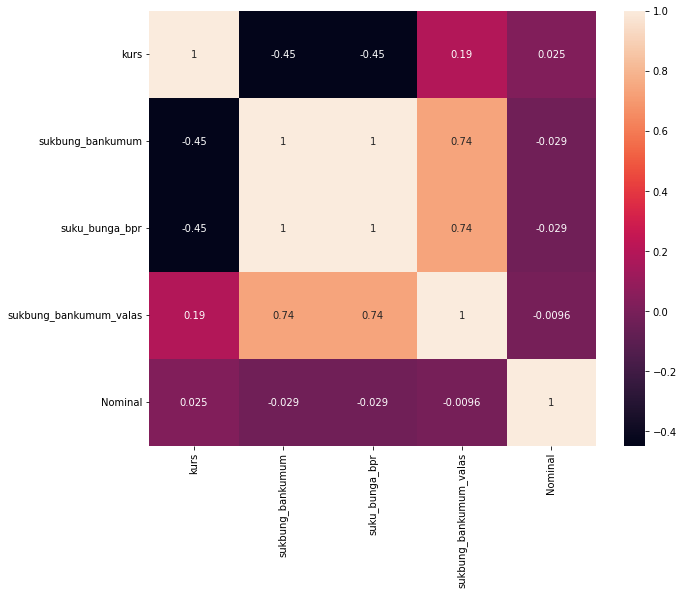

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(data[hight_corr].corr(), annot=True)
plt.show()

Dari kolom-kolom tersebut kami membuat beberapa Hypotesis Alternative yaitu
1. Suku bunga Bank Umum berpengaruh secara negatif terhadap kurs
2. Suku bunga BPR berpengaruh negatif pada kurs
3. Suku bunga Bank Umum valuta Asing berpengaruh Positif terhadap kurs
4. Nominal Simpanan berpengaruh positif terhadap kurs

Namun antara Suku Bunga Bank Umum, Suku Bunga Bank Umum Valas dan Suku Bunga BPR terjadi Multikolinearitas, dimana variabel bebas tersebut saling mempengaruhi satu sama lain, ini sangat tidak bagus jika melakukan uji Hypotesis Dengan Regressi. Oleh karena itu saya hanya kami hanya membuat Hypotesis Alternatif Baru yaitu
`Suku bunga perbengaruh terhadap kurs dengan Nominal Simpanan sebagai variabel Moderasi`

Karena variabel Nominal Simpanan ini memiliki nilai negatif dengan suku bunga dan suku bunga juga memiliki nilai korelasi negatif terhadap kurs artinya:

1. Jika Simpanan Bank naik maka suku bunga akan turun
2. Jika suku bunga turun maka kurs akan naik

Nah sebelum menyimpulkan dari hypotesis kami akan menguji Hypotesis Alternatif tersebut terlebih dahulu dengan Regresi Linear dengan model Statistika yang di sediakan oleh bahasa pemrograman Python.

## Hypotesis Testing

In [44]:
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [61]:
X = data[['Nominal', 'sukbung_bankumum', 'sukbung_bankumum_valas']]
y = data['kurs']

In [62]:
X = sm.add_constant(X)

In [63]:
X.head()

,const,Nominal,sukbung_bankumum,sukbung_bankumum_valas
0,1.0,4425035737,6.166667,0.75
1,1.0,18579173363,6.166667,0.75
2,1.0,307084500,6.166667,0.75
3,1.0,6583934015,6.166667,0.75
4,1.0,1049606446,6.166667,0.75


In [64]:
reg_model = sm.OLS(y, X).fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   kurs   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 5.881e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:25:43   Log-Likelihood:            -3.2819e+05
No. Observations:               49364   AIC:                         6.564e+05
Df Residuals:                   49360   BIC:                         6.564e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.60

In [65]:
alpha = reg_model.params['const']
print('Constanta dari model:' +str(round(alpha, 2)) + 'kurs')

Constanta dari model:16033.95kurs


In [66]:
beta1 = reg_model.params['Nominal']
print(print('Ketika Nominal Simpanan naik 1 maka akan naik: ' +str(round(beta1, 3)) + ' Kurs'))

Ketika Nominal Simpanan naik 1 maka akan naik: -0.0 Kurs
None


In [52]:
beta2 = reg_model.params['sukbung_bankumum']
print(print('Ketika Suku Bunga Naik 1 maka:' +str(round(beta2, 3)) + ' kurs turun'))

Ketika Suku Bunga Naik 1 maka:-5286.081 kurs turun
None


In [70]:
beta2 = reg_model.params['sukbung_bankumum_valas']
print(print('Ketika Suku Bunga Naik 1 maka:' +str(round(beta2, 3)) + ' kurs naik'))

Ketika Suku Bunga Naik 1 maka:763.744 kurs naik
None


Kita akan mncoba menganalisa seberapa kuat pengaruh Variabel Moderasi kita

In [68]:
X_1 = data['Nominal']
y_1 = data['sukbung_bankumum']

X_1 = sm.add_constant(X_1)

reg_model_1 = sm.OLS(y_1, X_1).fit()

print(reg_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:       sukbung_bankumum   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     41.90
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           9.69e-11
Time:                        09:26:08   Log-Likelihood:                -72298.
No. Observations:               49364   AIC:                         1.446e+05
Df Residuals:                   49362   BIC:                         1.446e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5585      0.005   1147.277      0.0

In [69]:
beta = reg_model_1.params['Nominal']
print(print('Constanta dari model: ' +str(round(beta, 3)) + ' Suku Bunga'))

Constanta dari model: -0.0 Suku Bunga
None


## Conclusion
Dari model yang telah dibuat tidak terjadi auto korelasi yaitu dengan nilai Durbin Wathson yang tidak melebihi alpha 5% (0.05), selain itu Juga tidak terjadi Heteroskedastisity karena nilai R-Squared dan Observasi R-Squared tidak memiliki selisih jauh, bahkan nilai nya sama.

Variabel Nominal Berpengaruh Negatif tidak signifikan karena Nilai Probability F-Statistik berada di atas alpha 5% artinya hubungan Variabel Nominal terhadap berada di nilai Signifikan 10%. Namun variabel Moderasi Ini memiliki pengaruh negatif terhadap Suku Bunga yang artinya, semakin banyak simpanan maka bank akan menurunkan suku bunganya.
Variabel Suku Bunga berpengaruh negatif signifikan terhadap Kurs. Dilihat dari nilai probability F-Statistik lebih rendah dari nilai signifikan 5% yang artinya Variabel Suku Bunga memiliki pengaruh yang kuat terhadap Kurs. Artinya Jika semakin tinggi suku bunga maka akan semakin rendah nilai kurs.

### Kesimpulan dan Saran
Kami mulai membahas dari variabel Moderasi terlebih dahulu untuk mengambil keputusan:

-> Simpanan (Nominal) semakin tinggi simpanan maka suku bunga semakin rendah = Jadi, kebalikannya, jika lebih banyak nasabah yang melakukan Pinjaman maka bank juga akan menaikan suku bunganya.

-> Suku Bunga semakin tinggi kurs semakin rendah = Jadi, semakin tinggi bunga bank maka nilai kurs akan semakin rendah.

Arrtinya Simpanan (moderasi) semakin rendah/pinjaman semakin tinggi maka bunga bank akan semakin tinggi dan jika Bunga semakin tinggi maka Nilai Jual Kurs akan semakin menurun. Dengan kata lain ketika nilai jual Kurs turun maka Nilai Rupiah akan naik dan ini bisa untuk menekan inflasi sehingga harga bahan pokok di Indonesia bisa menjadi lebih murah(turun) karena naiknya nilai Rupiah. Misalnya:

1 Dolar = 15000 Nah jika nilai Jual Kurs turun maka 1 Dolar = 12000 artinya

Jadi, salah satu kebijakan moneter yang bisa diterapkan pemerintah agar ekonomi indonesia menjadi lebih baik adalah dengan menaikan suku bunga. Karena seperti yang telah kami baca dari referensi berita di [CNBC Indonesia](https://www.cnbcindonesia.com/market/20220512141107-17-338507/suku-bunga-naik-inflasi-turun-tapi-awas-ekonomi-melambat#:~:text=Kenaikan%20suku%20bunga%20simpanan%20tersebut,maka%20inflasi%20juga%20akan%20turun.). Bahwa semakin tinggi suku bunga maka bisa menekan inflasi.

Pengertian singkat dari inflasi adalah kecenderungan dari harga-harga untuk menaik secara umum dan terus-menerus. (Boediono, 2001: 155) Yang dimaksud dengan inflasi adalah proses kenaikan harga-harga umum barang-barang secara terus-menerus selama satu periode tertentu. (Nopirin, 2000 : 25).

Dari turunnya nilai Jual Kurs inilah maka harga barang(import) juga akan menurun oleh karena itu hal ini bisa untuk memulihkan ekonomi di Indonesia.